In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score

## Load the Dataset

In [3]:
pronostico

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [2]:
pronostico=pd.read_csv("D:\\DS-Project\\pronostico_dataset.csv",sep=';')

### Remove the Unwanted Column

In [4]:
pronostico.drop(columns='ID',axis=1,inplace=True)

In [5]:
pronostico

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [6]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
pronostico['prognosis']= label_encoder.fit_transform(pronostico['prognosis'])

In [8]:
x=pronostico.iloc[:,:-1]
y=pronostico.iloc[:,-1]
ss=StandardScaler()
x=ss.fit_transform(x)

In [9]:
x

array([[ 1.95385881, -1.44408831, -1.08668383, -1.98131478],
       [ 0.35799212, -0.12326958, -0.58598051,  0.93492889],
       [ 0.9972193 ,  0.9987116 ,  2.00521155,  0.01916893],
       ...,
       [-0.57240332, -0.21309482,  1.26379482,  1.94072729],
       [ 0.3508814 ,  0.5731393 , -0.25342752,  0.51988249],
       [ 0.23853111, -0.35563406, -0.37600957,  0.7665241 ]])

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int32

In [11]:
x.dtype,y.dtype

(dtype('float64'), dtype('int32'))

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [13]:
x_train.shape,y_train.shape

((4800, 4), (4800,))

In [31]:
accuracy={}
recall={}
precision={}
f1={}
models={}

## Model Building

### Random Forest

In [17]:
Kfold=KFold(n_splits=10)

In [19]:
param_grid=[{'n_estimators':range(64,125),'max_depth':[2,3,4,5]}]
rf = RandomForestClassifier(max_features=4,max_depth=3,criterion='gini',random_state=23)
gsrf = GridSearchCV(rf,param_grid,scoring='recall',n_jobs=1,cv=Kfold)
gsrf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=3, max_features=4,
                                              random_state=23),
             n_jobs=1,
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'n_estimators': range(64, 125)}],
             scoring='recall')

In [20]:
gsrf.best_params_ , gsrf.best_score_

({'max_depth': 2, 'n_estimators': 107}, 0.7891963966425528)

In [32]:
model_rf = RandomForestClassifier(n_estimators=107,max_depth=2, max_features=4,criterion='gini',random_state=23)
model_rf.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_rf.predict(x_test)))
print(metrics.recall_score(y_test,model_rf.predict(x_test)))
print( metrics.classification_report(y_test,model_rf.predict(x_test)))
print('confusion matrix:n/n',metrics.confusion_matrix(y_test,model_rf.predict(x_test)))
accuracy['rf']=metrics.accuracy_score(y_test,model_rf.predict(x_test))
recall['rf']=metrics.recall_score(y_test,model_rf.predict(x_test))
precision['rf']=metrics.precision_score(y_test,model_rf.predict(x_test))
f1['rf']=metrics.f1_score(y_test,model_rf.predict(x_test))
models['rf']=model_rf

0.7408333333333333
0.8267326732673267
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       594
           1       0.71      0.83      0.76       606

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

confusion matrix:n/n [[388 206]
 [105 501]]


### roc-curve

Text(0, 0.5, 'True Positive Rate')

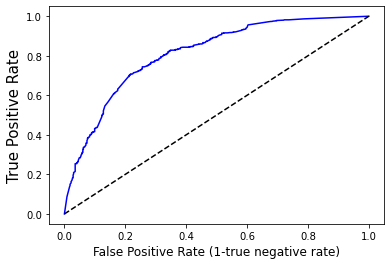

In [36]:
auc=metrics.roc_auc_score(y_test,model_rf.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,model_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)